<a href="https://colab.research.google.com/github/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/5_An%C3%A1lisis_de_las_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=black size = 6 face="Verdana"><center><strong>SUPPLY CHAIN ANALYTICS - Gestión Moderna de la Cadena de Suministros</center></font>


  <font color=black><center>Fecha: 25-08-2024</center>


  <font color=#48c9b0><center>Elaborado por: Mg. Ec. Enrique F. Gutierrez Rivasplata</center>

### **Importando Paquetes:**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots




### **Comprensión empresarial**
BLUEX es un Operador Logístico con sede principal en Santiago de Chile, que opera una cadena de Hipermercados de Consumo Masivo, grandes almacenes de distribución del tipo SORTER.

En este proyecto, nos enfocaremos en responder las siguientes preguntas:
1. ¿Qué Categoría de productos tiene ventas mínimas y máximas?
2. ¿Qué Categoría de productos tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averiguar el coeficiente de la media a la desviación estándar.
3. ¿Qué Categoría de productos tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2016?
4. Algunos días festivos tienen un impacto negativo en las ventas. Descubramos los días festivos que tienen mayores ventas que las ventas medias en temporada no festiva para todas los productos juntos
5. Proporcionar una vista mensual y semestral de las ventas en unidades y brindar información.
6. Crear predicciones para pronosticar la demanda.

### Comprensión de datos

En [Kaggle](https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data). Estos son los datos que cubren las ventas del 2015-01-01 al 2018-01-01.



### **Lectura y Comprensión de los Datos:**

In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer el archivo Excel con los datos simulados
# ==============================================================================
df = pd.read_excel('/content/drive/MyDrive/Análisis - Python/DATOS/Data1.xlsx')


# Copiamos el dataframe
# ==============================================================================
data = df.copy()

# Mostrar las primeras filas del dataframe
# ==============================================================================
data.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,0.00,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328


In [ ]:
# Mostramos el número de filas y columnas
# ==============================================================================
print(f'El dataframe tiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataframe tiene 26162 filas y 81 columnas.


In [ ]:
# Identifique la cantidad de NAs en cada característica y seleccione solo aquellas que tengan NAs
# ==============================================================================
total_NA = data.isnull().sum()[data.isnull().sum() != 0]

# Calcular el porcentaje de NAs en cada característica.
# ==============================================================================
percent_NA = data.isnull().sum()[data.isnull().sum() != 0]/data.shape[0]

# Resumir nuestros hallazgos en un marco de datos
# ==============================================================================
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NAs', 'Percentage']).sort_values('Total NAs', ascending=False)
missing

,Total NAs,Percentage
Proceso_Devol,21535,0.82314
Cod_Cliente_Devol,21535,0.82314


In [ ]:
# Dividir F_Orden y crear nuevas columnas (día, mes y año)
# ==============================================================================
data["Dia"]= pd.DatetimeIndex(data['F_Orden']).day
#data['Mes'] = pd.DatetimeIndex(data['F_Orden']).month
#data['Year'] = pd.DatetimeIndex(data['F_Orden']).year
data.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica,Dia
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385,3
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501,3
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462,3
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328,3
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328,5


### **P1: ¿Qué Categoría de Productos tiene ventas mínimas y máximas?**

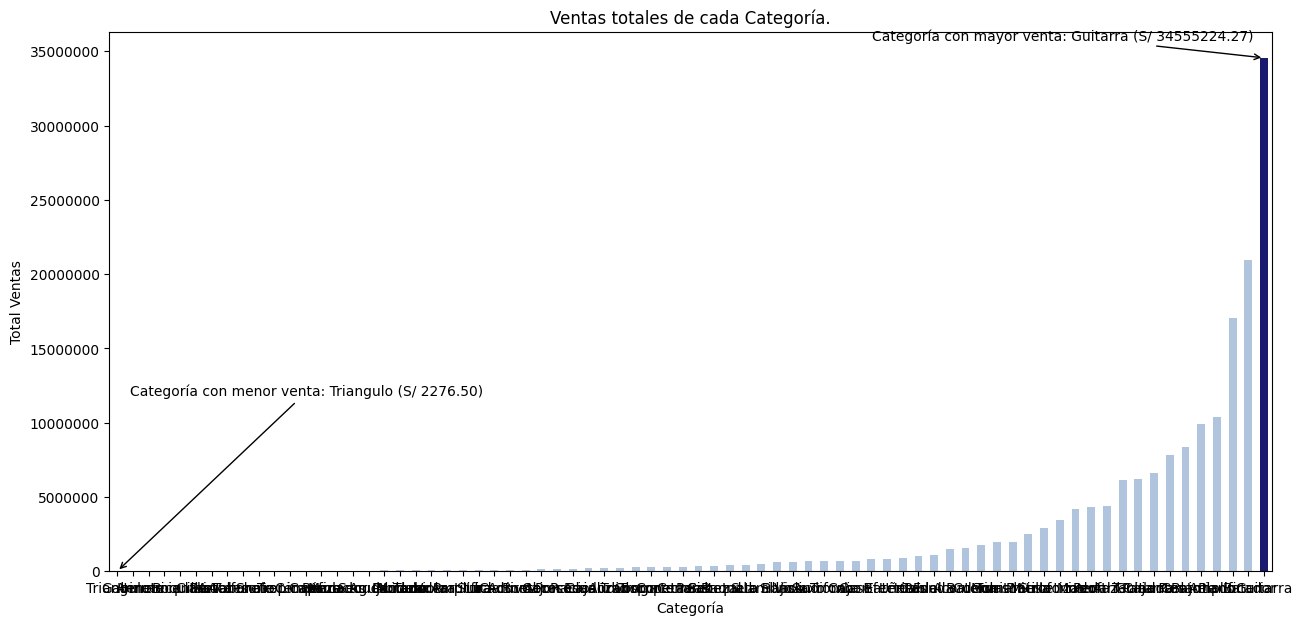

In [ ]:
# Ventas MIN y MAX por Categoría
# ==============================================================================
plt.figure(figsize=(15,7))

# Suma "Venta_Totales" para cada tienda, luego ordena por ventas totales
ventas_totales_para_cada_categoria = data.groupby('Familia')['Venta_Totales'].sum().sort_values()
ventas_totales_para_cada_categoria_array = np.array(ventas_totales_para_cada_categoria) # Convertimos en array

# Asignar un color específico para que las tiendas tengan menores y mayores ventas
clrs = ['lightsteelblue' if ((x < max(ventas_totales_para_cada_categoria_array)) and (x > min(ventas_totales_para_cada_categoria_array))) else 'midnightblue' for x in ventas_totales_para_cada_categoria_array]

ax = ventas_totales_para_cada_categoria.plot(kind='bar',color=clrs); # Agregue esta línea para crear la trama y asígnela a ax

# Rotar las etiquetas del eje x en 50 grados
plt.xticks(rotation=50)

# Obtener los índices de la categoría con menor y mayor venta
min_index = ventas_totales_para_cada_categoria.index.get_loc(ventas_totales_para_cada_categoria.idxmin()) # Obtener índice entero
max_index = ventas_totales_para_cada_categoria.index.get_loc(ventas_totales_para_cada_categoria.idxmax()) # Obtener índice entero

# Obtener las barras correspondientes
min_bar = ax.patches[min_index]
max_bar = ax.patches[max_index]

# Anotaciones con formato mejorado
ax.annotate(f"Categoría con menor venta: {ventas_totales_para_cada_categoria.index[min_index]} (S/ {min_bar.get_height():.2f})",
            xy=(min_bar.get_x() + min_bar.get_width() / 2, min_bar.get_height()),
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            ha='center', va='bottom')

ax.annotate(f"Categoría con mayor venta: {ventas_totales_para_cada_categoria.index[max_index]} (S/ {max_bar.get_height():.2f})",
            xy=(max_bar.get_x() + max_bar.get_width() / 2, max_bar.get_height()),
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            ha='center', va='bottom')

# Grafico
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Ventas totales de cada Categoría.')
plt.xlabel('Categoría')
plt.ylabel('Total Ventas')
plt.show()

### **P2: ¿Qué Categoría de Productos tiene la desviación estándar máxima, es decir, las ventas varían mucho? Además, ¿averiguar el coeficiente de la media a la desviación estándar?**

In [ ]:
# ¿Qué tienda tiene la desviación estándar máxima?
# ==============================================================================
data_std = pd.DataFrame(data.groupby('Familia')['Venta_Totales'].std().sort_values(ascending=False))
print("La tienda tiene una desviación estándar máxima que es "+str(data_std.head(1).index[0])+" con S/ {0:.0f}".format(data_std.head(1).Venta_Totales[data_std.head(1).index[0]]))

La tienda tiene una desviación estándar máxima que es Controlador con S/ 119367


<ipython-input-23-f4d07c35fb55>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Familia'] == data_std.head(1).index[0]]['Venta_Totales'])


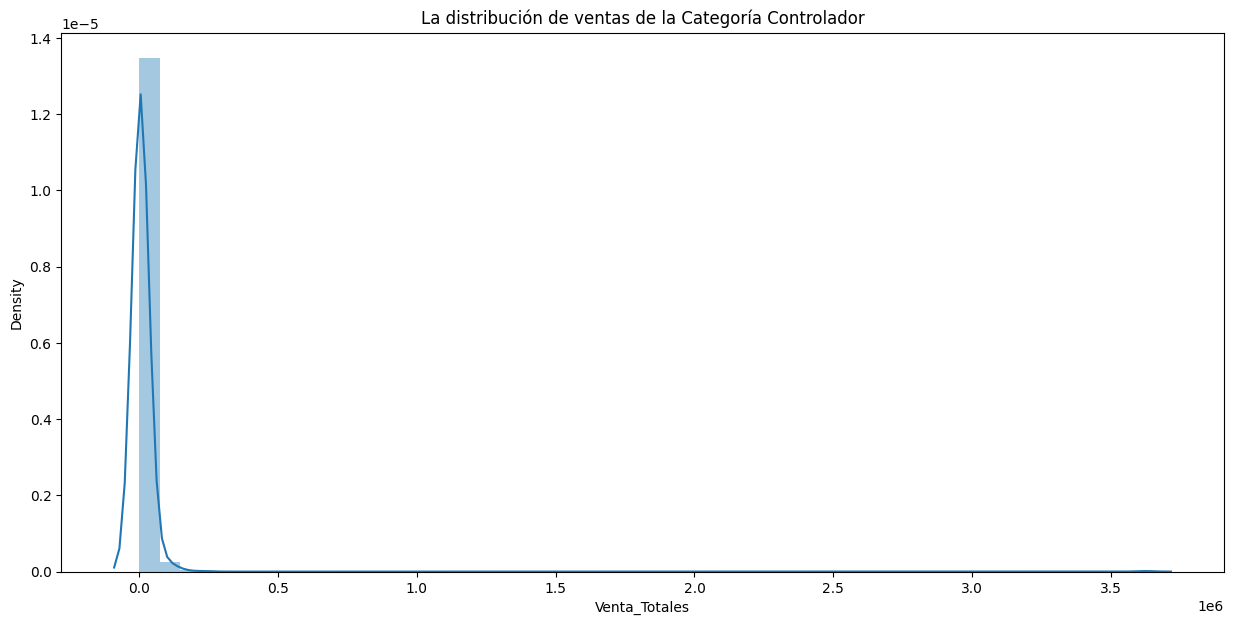

In [ ]:
# La distribución de la tienda tiene una desviación estándar máxima.
# ==============================================================================
plt.figure(figsize=(15,7))
sns.distplot(data[data['Familia'] == data_std.head(1).index[0]]['Venta_Totales'])
plt.title('La distribución de ventas de la Categoría '+ str(data_std.head(1).index[0]))
plt.show()

In [ ]:
# Coeficiente de media a desviación estándar
# ==============================================================================
coef_mean_std = pd.DataFrame(data.groupby('Familia')['Venta_Totales'].std() / data.groupby('Familia')['Venta_Totales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Venta_Totales':'Coeficiente de media a desviación estándar'})
coef_mean_std

,Coeficiente de media a desviación estándar
Familia,
Abrazadera,1.648088
Accesorio,4.821314
Accesorio Limpieza,1.698149
Acordeon,2.222103
Afinador Guitarra,2.039435
...,...
Trompeta,1.885401
Tropicana,0.560645
Uñetas,3.629292


<ipython-input-26-8a7d43f10efa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Familia'] == coef_mean_std_max.tail(1).index[0]]['Venta_Totales'])


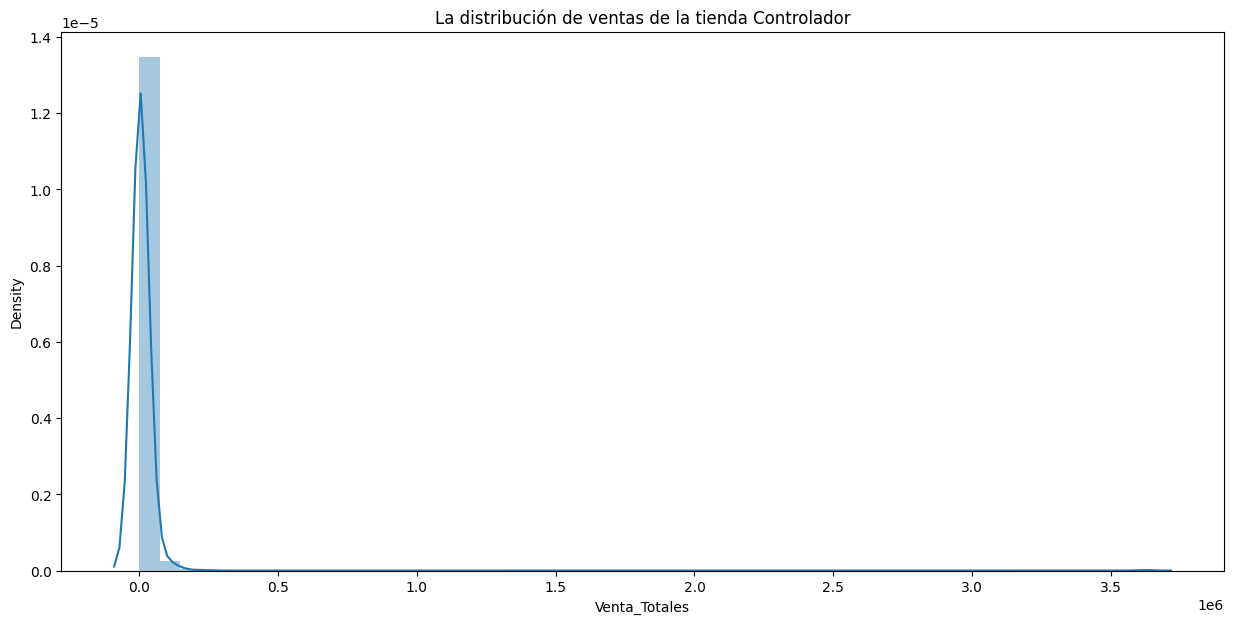

In [ ]:
# La distribución de la Categoria tiene un coeficiente máximo de media a desviación estándar.
# ==============================================================================
coef_mean_std_max = coef_mean_std.sort_values(by='Coeficiente de media a desviación estándar')
plt.figure(figsize=(15,7))
sns.distplot(data[data['Familia'] == coef_mean_std_max.tail(1).index[0]]['Venta_Totales'])
plt.title('La distribución de ventas de la tienda '+str(coef_mean_std_max.tail(1).index[0]))
plt.show()

### **T3: ¿Qué Categoría tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2016?**

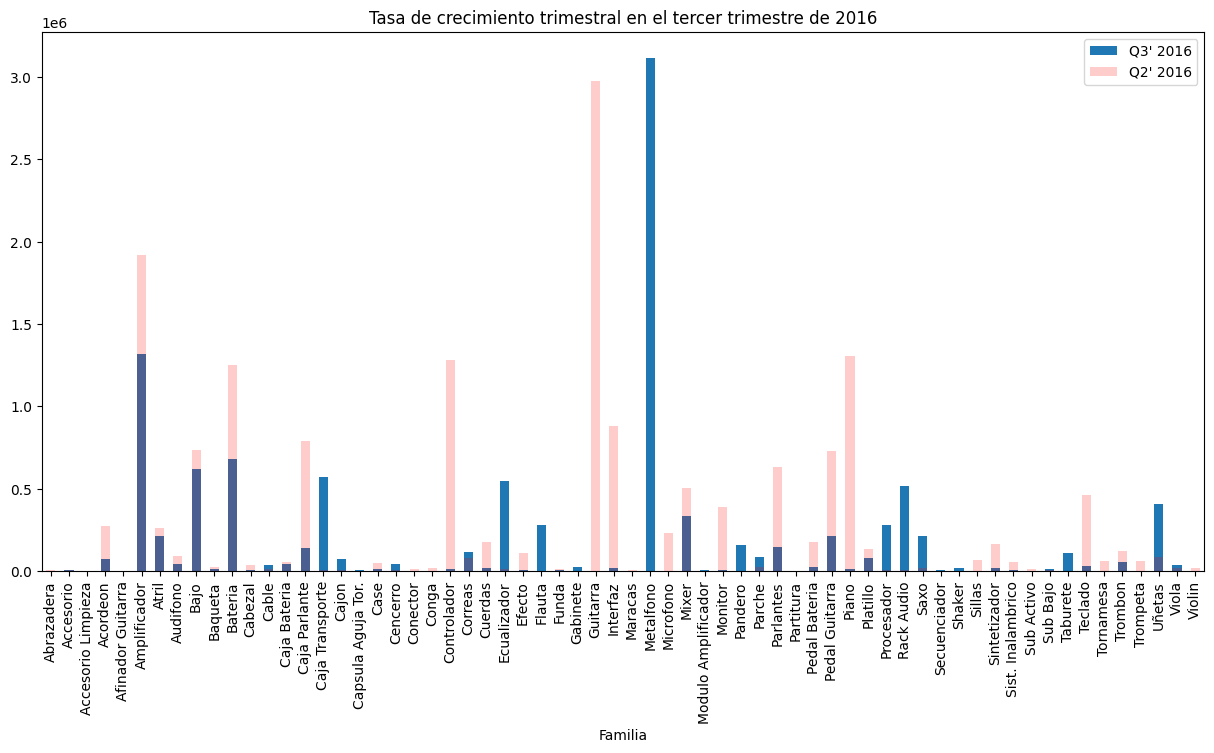

In [ ]:
# Tasa de Crecimiento Trimestral por Categoría
# ==============================================================================
plt.figure(figsize=(15,7))

# Ventas del tercer trimestre de 2016
Q3 = data[(data['F_Orden'] > '2016-07-01') & (data['F_Orden'] < '2016-09-30')].groupby('Familia')['Venta_Totales'].sum()

# Ventas del segundo trimestre de 2016
Q2 = data[(data['F_Orden'] > '2016-04-01') & (data['F_Orden'] < '2016-06-30')].groupby('Familia')['Venta_Totales'].sum()

# Trazar la diferencia entre las ventas del segundo y tercer trimestre
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2016", "Q2' 2016"])
plt.title("Tasa de crecimiento trimestral en el tercer trimestre de 2016")
plt.show()

In [ ]:
#  Las Categorias tienen una buena tasa de crecimiento trimestral en el tercer trimestre de 2016
# ==============================================================================
print('Las Categorias tienen una buena tasa de crecimiento trimestral en el tercer trimestre del 2016. '+str(Q3.idxmax())+' con S/' +str(Q3.max()))

Las Categorias tienen una buena tasa de crecimiento trimestral en el tercer trimestre del 2016. Guitarra con S/3117619.08


### **P4: Algunos días festivos tienen un impacto negativo en las ventas. Descubra los días festivos que tienen mayores ventas que las ventas medias en temporada no festiva para todas las Categorías juntas**

**Eventos festivos:**

|**Descripción del Feriado**|**2015**|**2016**|**2017**|
|:---|:---|:---|:---|
|Inicio de Año|01-01-2015|01-01-2016|01-01-2017|
|Semana Santa|02-04-2015|24-03-2016|13-04-2017|
|Semana Santa|03-04-2015|25-03-2016|14-04-2017|
|Semana Santa|05-04-2015|--|16-04-2017|
|Dia del Trabajo|01-05-2015|01-05-2016|01-05-2017|
|Dia de la Madre|10-05-2015|08-05-2016|14-05-2017|
|Dia del Padre|21-06-2015|19-06-2016|18-06-2016|
|Dia del Indio|24-06-2015|--|--|
|Dia de San Pedro y San Pablo|29-06-2015|29-06-2016|29-06-2017|
|Dia de la Independencia Nacional|28-07-2015|28-07-2016|28-07-2017|
|Fiestas Patrias|29-07-2015|29-07-2019|29-07-2017|
|Dia de Santa Rosa de Lima|30-08-2015|30-08-2016|30-08-2017|
|Dia del Combate de Angamos|08-10-2015|08-10-2016|08-10-2017|
|Dia de todos los Santos|01-11-2015|01-11-2016|01-11-2017|
|Dia del Niño|20-11-2015|20-11-2016|20-11-2017|
|Dia de la Inmaculada Concepción|08-12-2015|08-12-2016|08-11-2017|
|Noche Buena|24-12-2015|--|--|
|Navidad|25-12-2015|25-12-2016|25-12-2017|

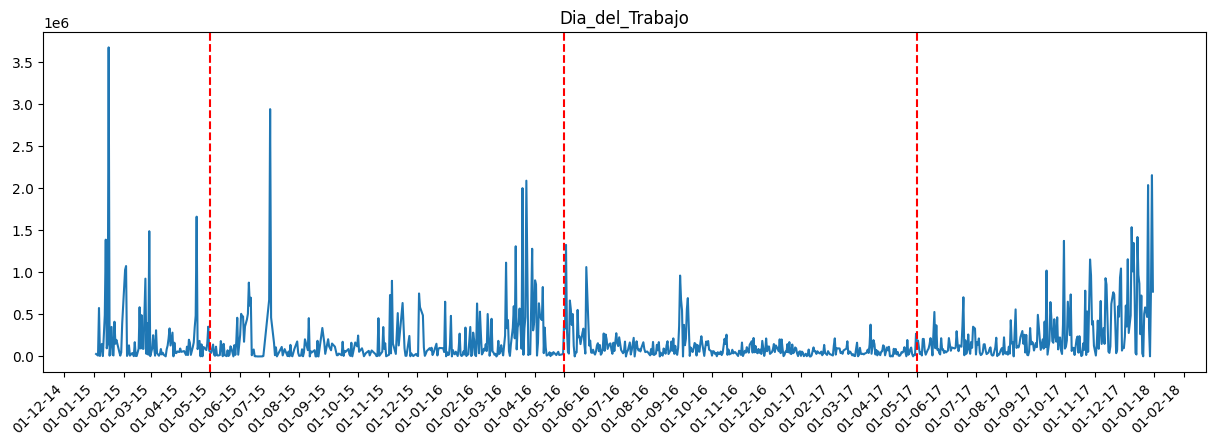

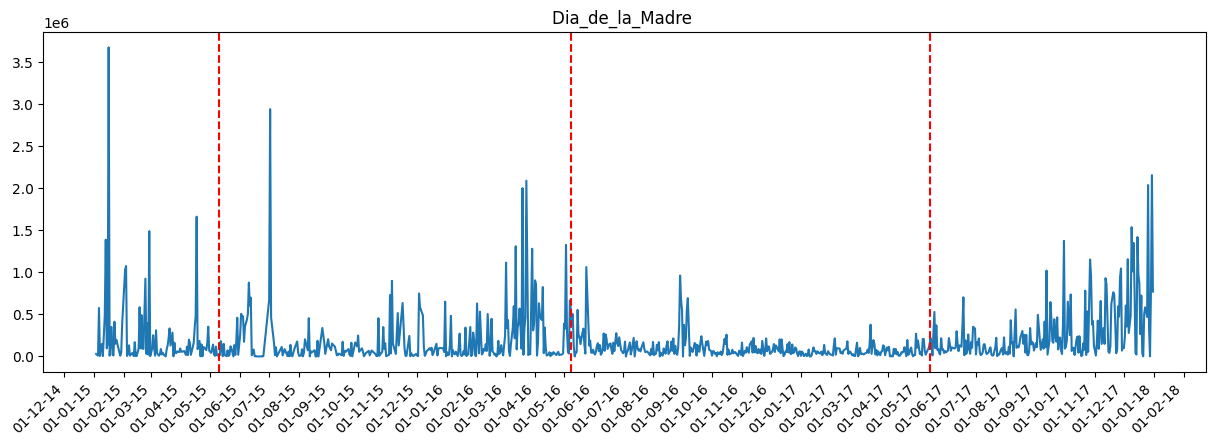

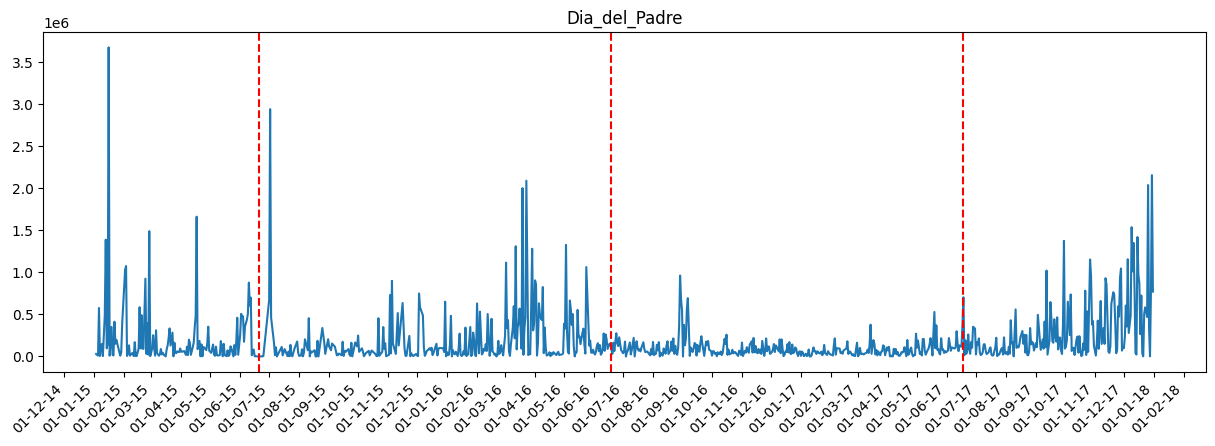

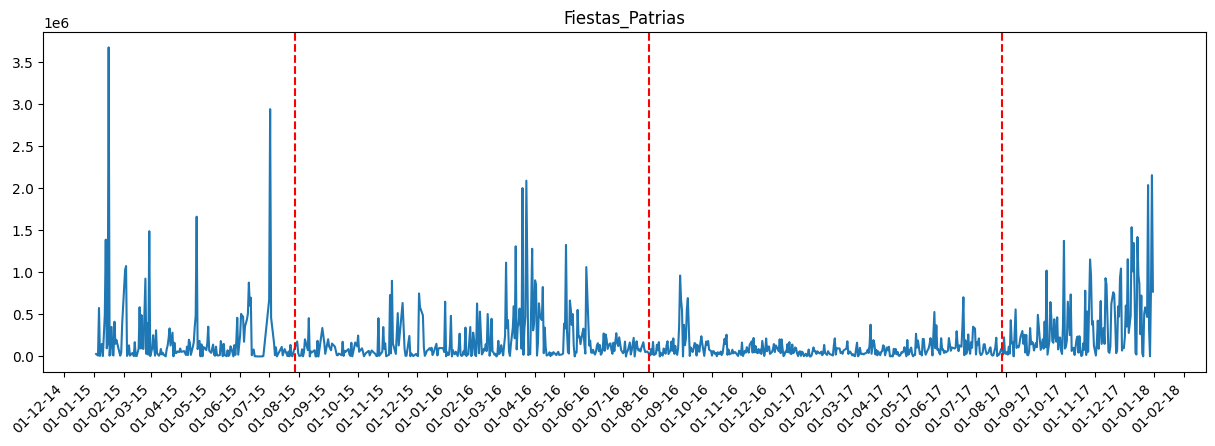

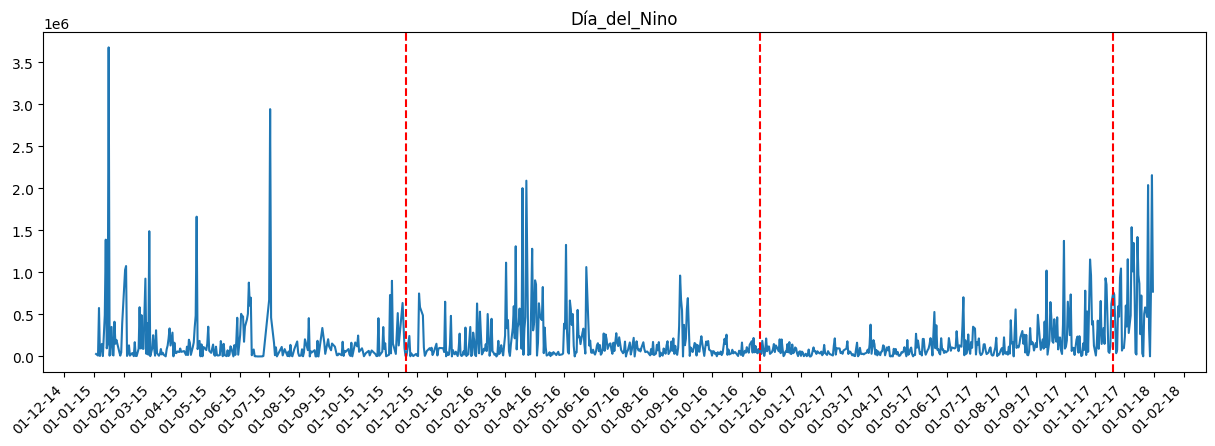

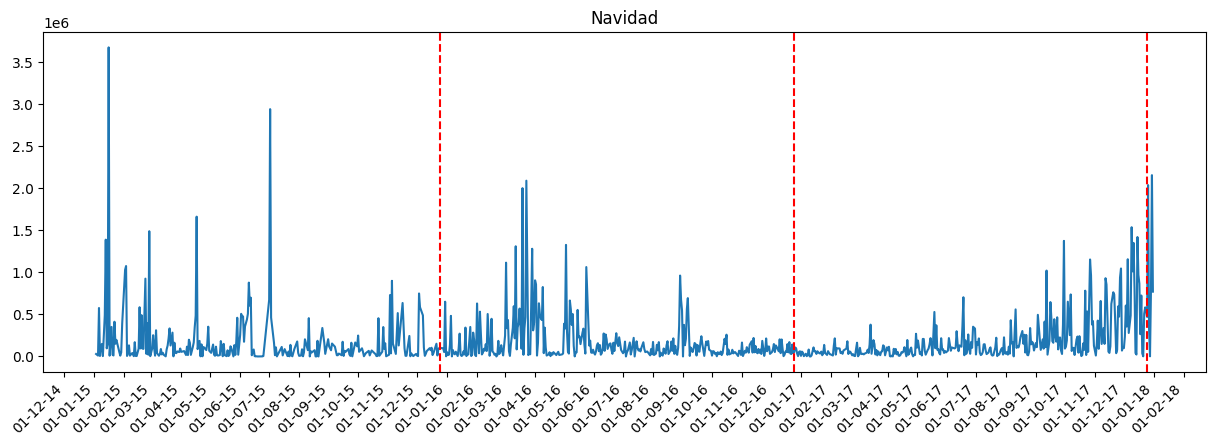

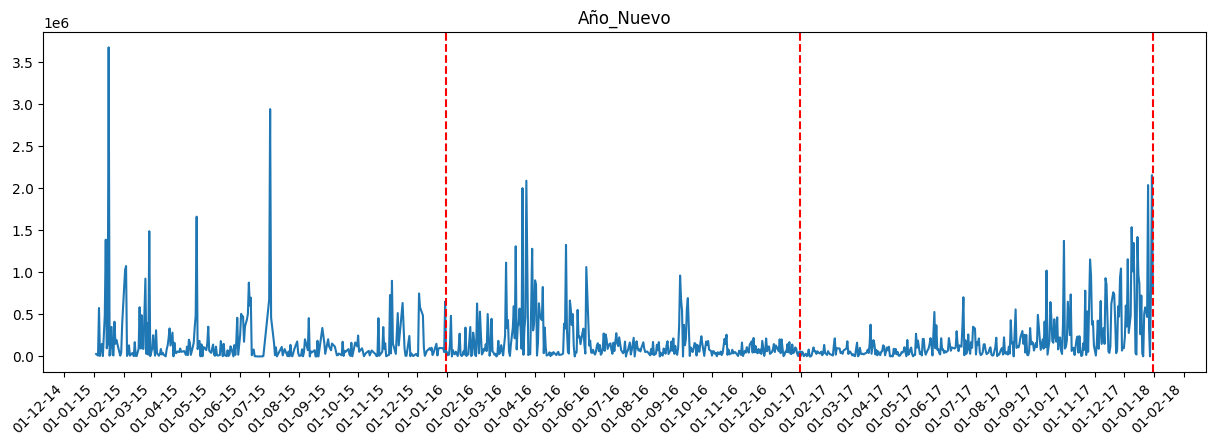

In [ ]:
#  Dias con impacto positivo o negativo en las Ventas
# ==============================================================================
from matplotlib import dates

def plot_line(data,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(data['F_Orden'],data['Venta_Totales'],label=holiday_label)

    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')

    plt.title(holiday_label)
    x_dates = data['F_Orden'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=45)
    plt.show()

# Dias Festivos en Perú a nivel Nacional desde 2015 al 2017
total_sales = data.groupby('F_Orden')['Venta_Totales'].sum().reset_index()
Dia_del_Trabajo =['1-5-2015', '1-5-2016', '1-5-2017']
Dia_de_la_Madre =  ['10-5-2015', '8-5-2016', '14-5-2017']
Dia_del_Padre =  ['21-6-2015', '19-6-2016', '18-6-2017']
Fiestas_Patrias = ['28-7-2015', '28-7-2016', '28-7-2017']
Día_del_Nino = ['20-11-2015', '20-11-2016', '20-11-2017']
Navidad = ['25-12-2015', '25-12-2016', '25-12-2017']
New_Year = ['31-12-2015', '31-12-2016', '31-12-2017']

plot_line(total_sales,Dia_del_Trabajo,'Dia_del_Trabajo')
plot_line(total_sales,Dia_de_la_Madre ,'Dia_de_la_Madre ')
plot_line(total_sales,Dia_del_Padre,'Dia_del_Padre')
plot_line(total_sales,Fiestas_Patrias,'Fiestas_Patrias')
plot_line(total_sales,Día_del_Nino,'Día_del_Nino')
plot_line(total_sales,Navidad,'Navidad')
plot_line(total_sales,New_Year,'Año_Nuevo')

Las ventas aumentaron durante el día Año Nuevo. Y las ventas disminuyeron durante el día del Trabajo.

In [ ]:
# Ventas del día del Trabajo
# ==============================================================================
data.loc[data.F_Orden.isin(Dia_del_Trabajo)] # Primera Forma

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica,Dia
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,6.306184e+04,5
5,2015-01-05,2204393,3121,1002740,Shipping,Second Class,CON-10239858380,2015-01-06,2015-01-06,140,...,0.0,252.000000,118.461538,84.0,210.000000,404.061538,195755.00,2696.625,1.988557e+05,5
9,2015-01-05,2204394,3122,207711,Shipping,Standard Class,CON-10425791007,2015-01-06,2015-01-06,26,...,0.0,67.485600,31.724000,29.2,56.238000,108.207680,145145.00,11563.750,1.568170e+05,5
13705,2016-01-05,2213631,12359,209047,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,32,...,0.0,49.422680,23.232884,21.0,41.185566,79.245254,690081.35,0.000,6.901606e+05,5
13707,2016-01-05,2213633,12361,208804,Shipping,Second Class,CON-10410478442,2016-01-05,2016-01-05,40,...,674887.5,77.523574,36.442706,82.6,64.602978,124.302756,4199300.00,674887.500,4.874312e+06,5
13708,2016-01-05,2213631,12359,1100474,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,34,...,0.0,18.451729,8.673889,41.8,15.376440,29.585849,1316903.35,0.000,1.316933e+06,5
13709,2016-01-05,2213633,12361,1094584,Shipping,Standard Class,CON-10410478442,2016-01-05,2016-01-05,23,...,0.0,25.013975,11.758706,5.4,20.844979,40.107878,79762.20,0.000,7.980231e+04,5
13711,2016-01-05,2213633,12361,1101105,Shipping,Second Class,CON-10410478442,2016-01-05,2016-01-05,23,...,0.0,35.819550,16.838250,4.2,29.849625,57.433740,487293.45,0.000,4.873509e+05,5
13712,2016-01-05,2213634,12362,1099671,Shipping,Second Class,CON-10429654713,2016-01-05,2016-01-05,11,...,0.0,288.511200,135.624923,105.8,240.426000,462.604283,1924807.50,324967.500,2.250238e+06,5
13713,2016-01-05,2213631,12359,209048,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,36,...,0.0,39.538144,18.586307,23.8,32.948453,63.396203,776341.65,0.000,7.764050e+05,5


In [ ]:
# Ventas del día del Trabajo
# ==============================================================================
data.loc[data['F_Orden'].isin(Dia_del_Trabajo)] # Segunda Forma

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica,Dia
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,6.306184e+04,5
5,2015-01-05,2204393,3121,1002740,Shipping,Second Class,CON-10239858380,2015-01-06,2015-01-06,140,...,0.0,252.000000,118.461538,84.0,210.000000,404.061538,195755.00,2696.625,1.988557e+05,5
9,2015-01-05,2204394,3122,207711,Shipping,Standard Class,CON-10425791007,2015-01-06,2015-01-06,26,...,0.0,67.485600,31.724000,29.2,56.238000,108.207680,145145.00,11563.750,1.568170e+05,5
13705,2016-01-05,2213631,12359,209047,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,32,...,0.0,49.422680,23.232884,21.0,41.185566,79.245254,690081.35,0.000,6.901606e+05,5
13707,2016-01-05,2213633,12361,208804,Shipping,Second Class,CON-10410478442,2016-01-05,2016-01-05,40,...,674887.5,77.523574,36.442706,82.6,64.602978,124.302756,4199300.00,674887.500,4.874312e+06,5
13708,2016-01-05,2213631,12359,1100474,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,34,...,0.0,18.451729,8.673889,41.8,15.376440,29.585849,1316903.35,0.000,1.316933e+06,5
13709,2016-01-05,2213633,12361,1094584,Shipping,Standard Class,CON-10410478442,2016-01-05,2016-01-05,23,...,0.0,25.013975,11.758706,5.4,20.844979,40.107878,79762.20,0.000,7.980231e+04,5
13711,2016-01-05,2213633,12361,1101105,Shipping,Second Class,CON-10410478442,2016-01-05,2016-01-05,23,...,0.0,35.819550,16.838250,4.2,29.849625,57.433740,487293.45,0.000,4.873509e+05,5
13712,2016-01-05,2213634,12362,1099671,Shipping,Second Class,CON-10429654713,2016-01-05,2016-01-05,11,...,0.0,288.511200,135.624923,105.8,240.426000,462.604283,1924807.50,324967.500,2.250238e+06,5
13713,2016-01-05,2213631,12359,209048,Shipping,Standard Class,CON-10043405077,2016-01-05,2016-01-05,36,...,0.0,39.538144,18.586307,23.8,32.948453,63.396203,776341.65,0.000,7.764050e+05,5


In [ ]:
# Rango de fechas o periodo con las Ventas mas bajas
# ==============================================================================
min_sales = total_sales['Venta_Totales'].min()
min_sales_idx = total_sales['Venta_Totales'].idxmin()
start_date = total_sales.loc[min_sales_idx-6, 'F_Orden']
end_date = total_sales.loc[min_sales_idx+6, 'F_Orden']
print("Período de días con las ventas más bajas: ", start_date, "a", end_date)

Período de días con las ventas más bajas:  2017-01-04 00:00:00 a 2017-01-17 00:00:00


<Axes: title={'center': 'Ventas anuales en vacaciones de Año Nuevo'}, xlabel='Year'>

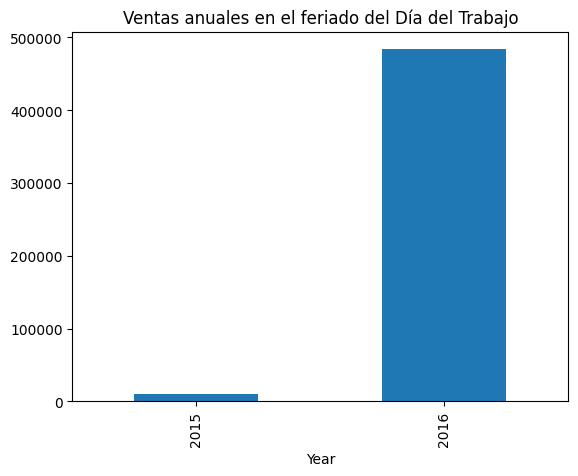

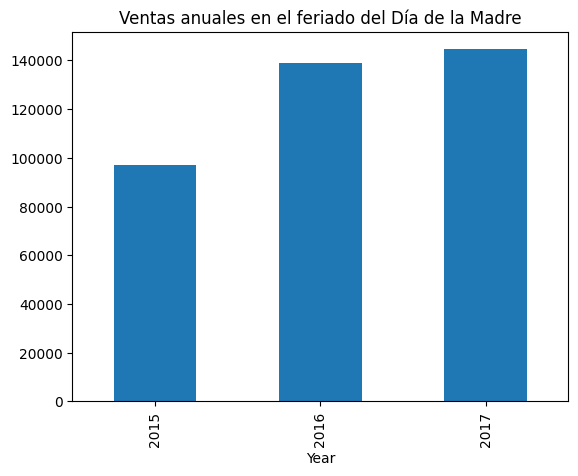

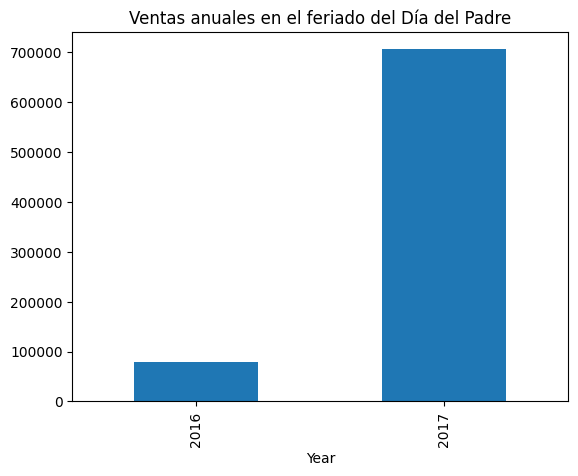

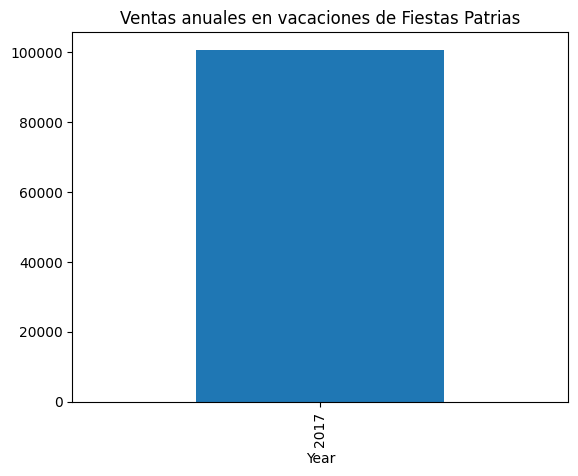

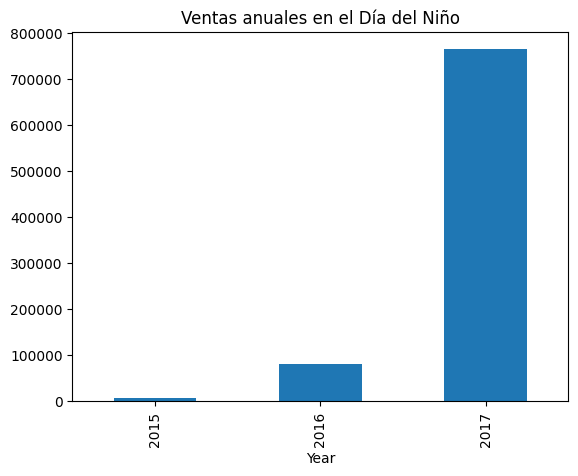

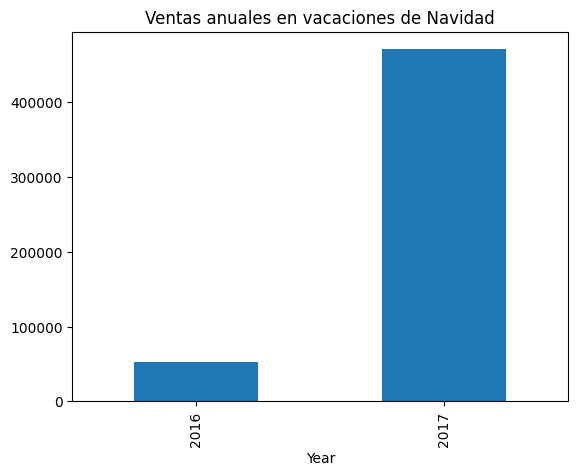

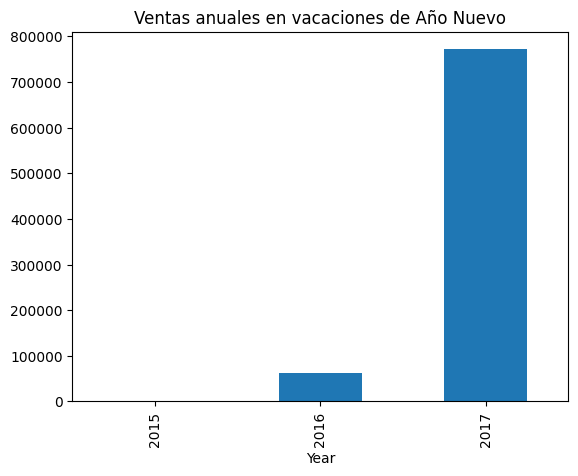

In [ ]:
# Ventas anuales en días festivos
# ==============================================================================
Dia_del_Trabajo_df = pd.DataFrame(data.loc[data.F_Orden.isin(Dia_del_Trabajo)].groupby('Year')['Venta_Totales'].sum())
Dia_de_la_Madre_df = pd.DataFrame(data.loc[data.F_Orden.isin(Dia_de_la_Madre)].groupby('Year')['Venta_Totales'].sum())
Dia_del_Padre_df = pd.DataFrame(data.loc[data.F_Orden.isin(Dia_del_Padre)].groupby('Year')['Venta_Totales'].sum())
Fiestas_Patrias_df = pd.DataFrame(data.loc[data.F_Orden.isin(Fiestas_Patrias)].groupby('Year')['Venta_Totales'].sum())
Día_del_Nino_df = pd.DataFrame(data.loc[data.F_Orden.isin(Día_del_Nino)].groupby('Year')['Venta_Totales'].sum())
Navidad_df = pd.DataFrame(data.loc[data.F_Orden.isin(Navidad)].groupby('Year')['Venta_Totales'].sum())
New_Year_df = pd.DataFrame(data.loc[data.F_Orden.isin(New_Year)].groupby('Year')['Venta_Totales'].sum())

Dia_del_Trabajo_df.plot(kind='bar',legend=False,title='Ventas anuales en el feriado del Día del Trabajo')
Dia_de_la_Madre_df.plot(kind='bar',legend=False,title='Ventas anuales en el feriado del Día de la Madre')
Dia_del_Padre_df.plot(kind='bar',legend=False,title='Ventas anuales en el feriado del Día del Padre')
Fiestas_Patrias_df.plot(kind='bar',legend=False,title='Ventas anuales en vacaciones de Fiestas Patrias')
Día_del_Nino_df.plot(kind='bar',legend=False,title='Ventas anuales en el Día del Niño')
Navidad_df.plot(kind='bar',legend=False,title='Ventas anuales en vacaciones de Navidad')
New_Year_df.plot(kind='bar',legend=False,title='Ventas anuales en vacaciones de Año Nuevo')

### **P5: Proporcionar una vista mensual y semestral de las ventas en unidades y brinde información**

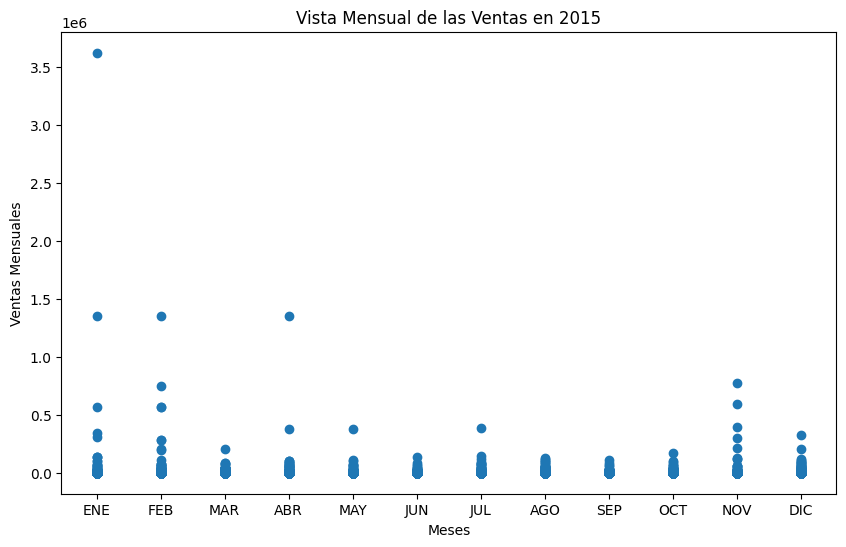

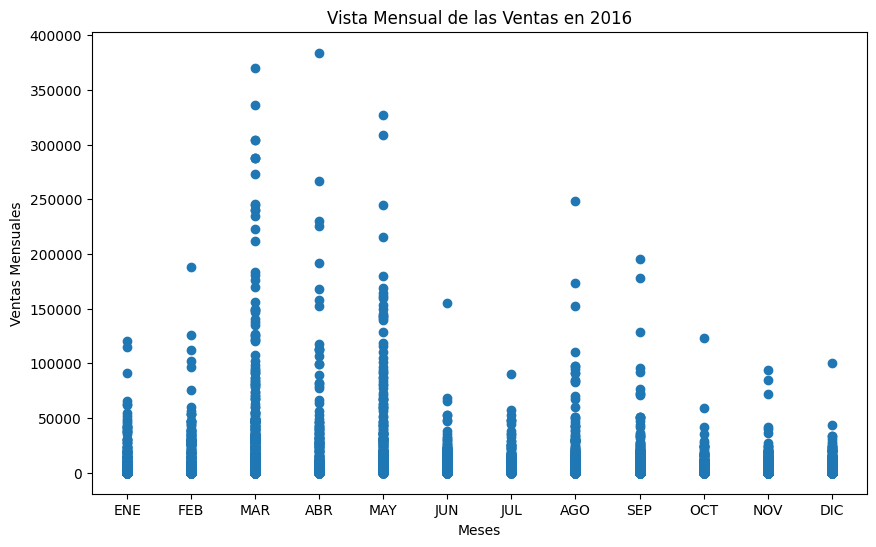

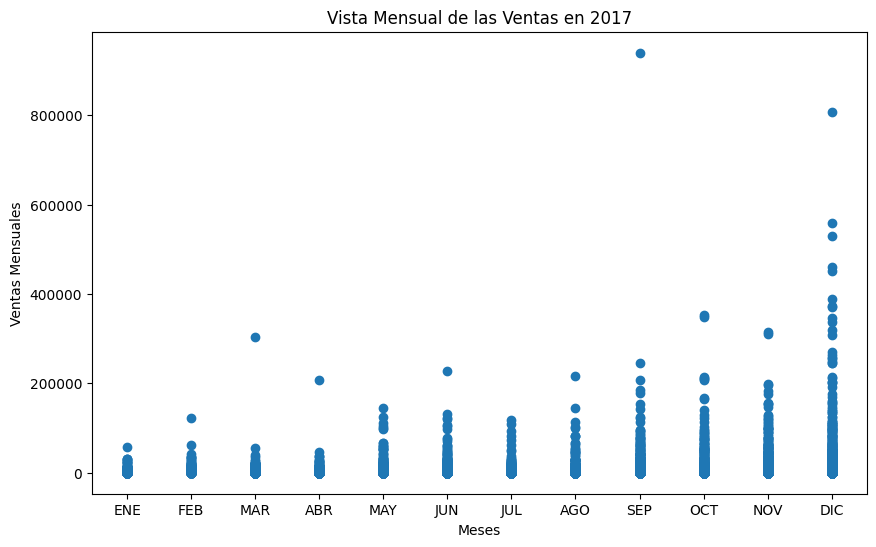

In [ ]:
# Vista mensual de las ventas de cada año
# ==============================================================================
plt.figure(figsize=(10,6))
plt.scatter(data[data.Year==2015]["Nombre_Mes"],data[data.Year==2015]["Venta_Totales"])
plt.xlabel("Meses")
plt.ylabel("Ventas Mensuales")
plt.title("Vista Mensual de las Ventas en 2015")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(data[data.Year==2016]["Nombre_Mes"],data[data.Year==2016]["Venta_Totales"])
plt.xlabel("Meses")
plt.ylabel("Ventas Mensuales")
plt.title("Vista Mensual de las Ventas en 2016")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(data[data.Year==2017]["Nombre_Mes"],data[data.Year==2017]["Venta_Totales"])
plt.xlabel("Meses")
plt.ylabel("Ventas Mensuales")
plt.title("Vista Mensual de las Ventas en 2017")
plt.show()

Text(0.5, 1.0, 'Vista mensual de ventas')

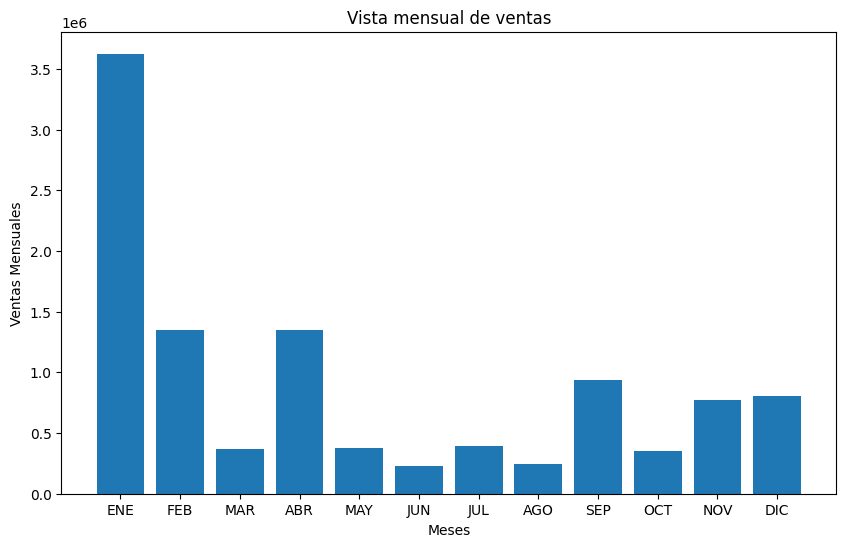

In [ ]:
# Vista mensual de las ventas de todos los años.
# ==============================================================================
plt.figure(figsize=(10,6))
plt.bar(data["Nombre_Mes"],data["Venta_Totales"])
plt.xlabel("Meses")
plt.ylabel("Ventas Mensuales")
plt.title("Vista mensual de ventas")

<Figure size 1000x600 with 0 Axes>

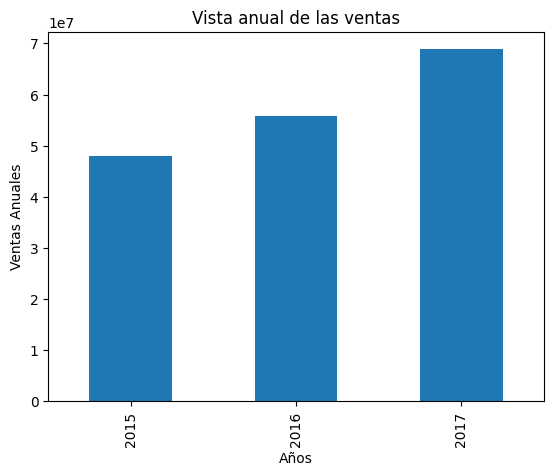

In [ ]:
# Vista anual de las ventas
# ==============================================================================
plt.figure(figsize=(10,6))
data.groupby("Year")[["Venta_Totales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Años")
plt.ylabel("Ventas Anuales")
plt.title("Vista anual de las ventas");

### **Construir modelos de Predicción para Pronosticar la Demanda (Modelado)**

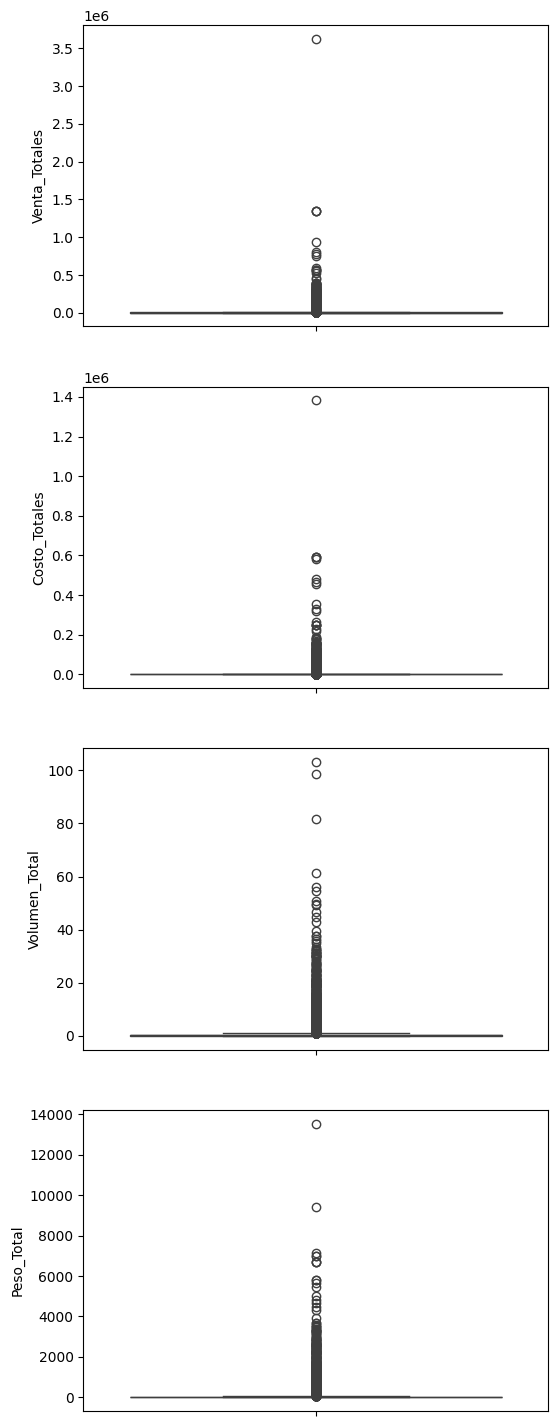

In [ ]:
# Encontrando valores Atípicos
# ==============================================================================
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Venta_Totales','Costo_Totales','Volumen_Total','Peso_Total']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

In [ ]:
# Analizando por Quantiles
# ==============================================================================
Q1 = data[['Venta_Totales', 'Volumen_Total', 'Costo_Totales', 'Peso_Total']].quantile(0.25)
Q3 = data[['Venta_Totales', 'Volumen_Total', 'Costo_Totales', 'Peso_Total']].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Eliminando los más altos y bajos de las variables
# ==============================================================================
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Creando la nueva data
# ==============================================================================
data_new = data[~((data[['Venta_Totales', 'Volumen_Total', 'Costo_Totales', 'Peso_Total']] < lower_bound) |
                  (data[['Venta_Totales', 'Volumen_Total', 'Costo_Totales', 'Peso_Total']] > upper_bound)).any(axis=1)]

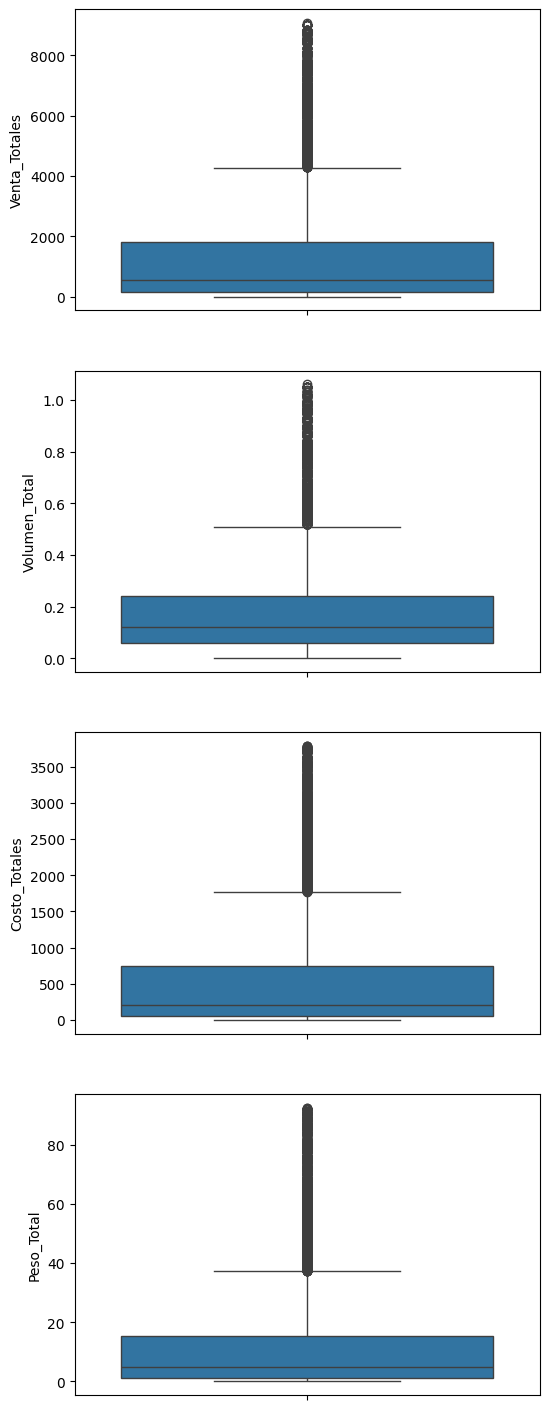

In [ ]:
# Comprobar los Valores Atípicos
# ==============================================================================
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Venta_Totales', 'Volumen_Total', 'Costo_Totales', 'Peso_Total']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [ ]:
# Eliminar los valores Atípicos
# ==============================================================================
#data_new = data[(data['Venta_Totales']<1500) & (data['Venta_Totales']>3500) & (data['Volumen_Total']>70)]
#data_new

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica,Dia


Aquí debemos saber el número exacto de los datos atípicos para eliminarlos.

### **Construir el Modelo**

In [ ]:
# Import sklearn
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Seleccionar características y destino
X = data_new[['Peso_Total','Volumen_Total','Costo_Totales','Dia','Mes','Year']]
y = data_new['Venta_Totales']

# Dividir datos para entrenar y probar (0.8 y 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 91.30344461587707
Error absoluto medio: 250.78691236392507
Error cuadrático medio: 301435.9672590958
Root Mean Squared Error: 549.0318453961444


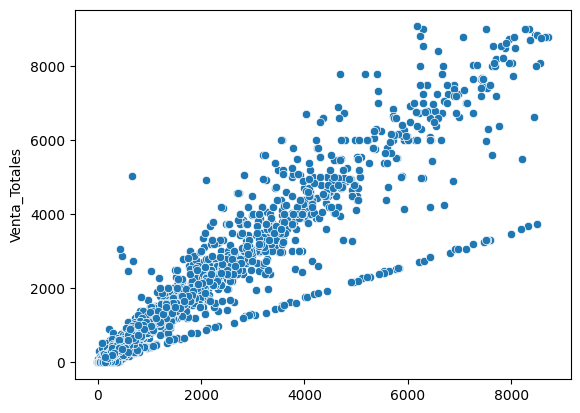

In [ ]:
# Modelo de Regresión Lineal
# ==============================================================================
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Proporcione x e y como argumentos con nombre
sns.scatterplot(x=y_pred, y=y_test);

Random Forest Regressor:

Accuracy: 95.92527725453937
Mean Absolute Error: 121.05116012615375
Mean Squared Error: 130779.71672526222
Root Mean Squared Error: 361.6347836219052


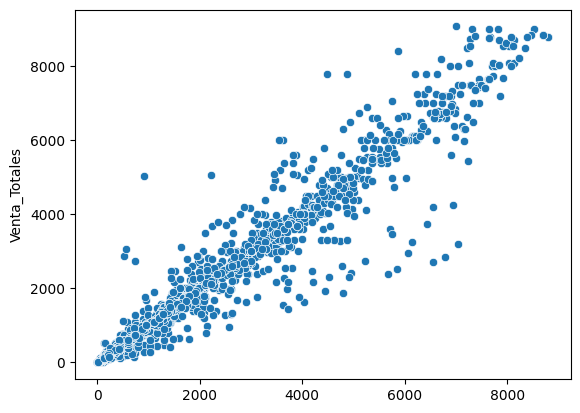

In [ ]:
# Random Forest Regressor
# ==============================================================================
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test);